In [103]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from scipy import stats, polyval
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 30
# plt.rcParams["font.weight"] = 'bold'
%matplotlib inline


# s-1-p vs s-1-w (pm10)

0.5304857796580529
[0.70258528]
14.3884719745217


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             S-1-w PM10   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                 5.708e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:09:10   Log-Likelihood:            -2.0869e+05
No. Observations:               50521   AIC:                         4.174e+05
Df Residuals:                   50519   BIC:                         4.174e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.3885      0.148     96.958      0.000      14.098      14.679
S-1-p PM10     0.7026      0.003    238.913      0.000       0.697       0.708
==============================================================================
Omnibus:                    29286.716   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1382215.785
Skew:                           2.113   Prob(JB):                         0.00
Kurtosis:                      28.274   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

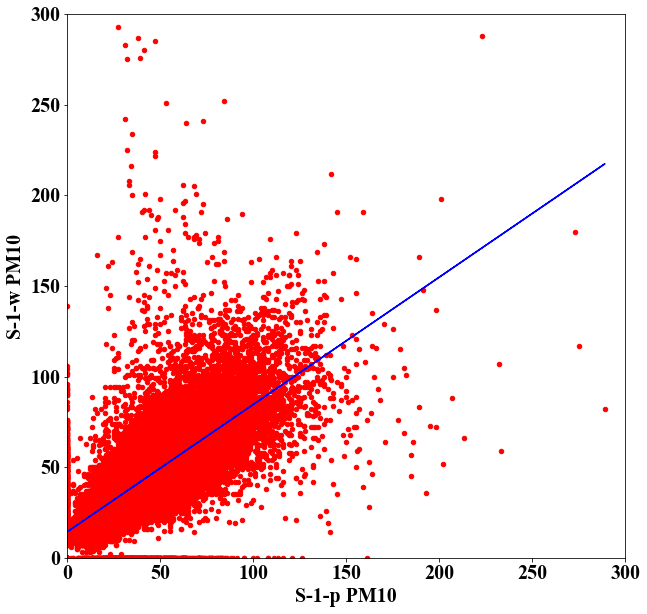

In [104]:
s1 = pd.read_csv('서면1.csv')

# 이상값 제거
s1=s1.dropna(axis=0) # 결측값 행 제거
# s1=s1['S-1-w PM10'].dropna(axis=0) # 결측값 행 제거
s1 = s1.drop(s1[s1['S-1-p PM10']> 300].index)
s1 = s1.drop(s1[s1['S-1-w PM10']> 300].index)
s1.shape

y=s1['S-1-w PM10']
x=s1['S-1-p PM10']

# slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)

# print("기울기(slope) = {:3.5f}".format(slope))
# print("상관계수(correlation coefficient) = {:3.5}" .format(r_value))
# print('R squared = {:3.2f}' .format(r_value**2))
#fit_intercept=False
# 선형회귀식
linear_regression = linear_model.LinearRegression()
fit = linear_regression.fit(X=pd.DataFrame(x), y=y)
prediction = linear_regression.predict(X=pd.DataFrame(x))
print(fit.score(pd.DataFrame(x),y))
print(fit.coef_)
print(fit.intercept_)


plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='S-1-p PM10', y='S-1-w PM10',color="red")
plt.plot(s1['S-1-p PM10'],prediction,'b')


ax.set_ylim(0,300)
ax.set_xlim(0,300)
s1['intercept'] = 1
lm = sm.OLS(s1['S-1-w PM10'], s1[['intercept','S-1-p PM10']])
results = lm.fit()
results.summary()

# s1 = pd.read_csv('서면1.csv')

# # 이상값 제거
# s1=s1.dropna(axis=0) # 결측값 행 제거
# # s1=s1['S-1-w PM10'].dropna(axis=0) # 결측값 행 제거
# s1 = s1.drop(s1[s1['S-1-p PM10']> 300].index)
# s1 = s1.drop(s1[s1['S-1-w PM10']> 300].index)
# s1.shape

# y=s1['S-1-w PM10']
# x=s1['S-1-p PM10']

# slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)

# print("기울기(slope) = {:3.5f}".format(slope))
# print("상관계수(correlation coefficient) = {:3.5}" .format(r_value))
# print('R squared = {:3.2f}' .format(r_value**2))

# # 선형회귀식
# linear_regression = linear_model.LinearRegression(fit_intercept=False)
# linear_regression.fit(X=pd.DataFrame(s1['S-1-p PM10']), y= s1['S-1-w PM10'])
# prediction = linear_regression.predict(X=pd.DataFrame(s1['S-1-p PM10']))


# plt.rcParams["font.size"] = 20
# plt.rcParams["figure.figsize"] = (10,10)
# ax = s1.plot(kind="scatter", x='S-1-p PM10', y='S-1-w PM10',color="red")
# plt.plot(s1['S-1-p PM10'],prediction,'b')


# ax.set_ylim(0,300)
# ax.set_xlim(0,300)

In [105]:
s1

,year,month,day,hour,S-1-p PM2.5,S-1-w PM2.5,S-1-p PM10,S-1-w PM10,intercept
0,2019,1,1,0,14.0,22.0,29.0,30.0,1
1,2019,1,1,1,13.0,18.0,31.0,31.0,1
2,2019,1,1,2,13.0,24.0,29.0,23.0,1
3,2019,1,1,3,18.0,18.0,25.0,19.0,1
4,2019,1,1,4,18.0,15.0,27.0,25.0,1
...,...,...,...,...,...,...,...,...,...
52579,2014,12,31,19,19.0,29.0,53.0,47.0,1
52580,2014,12,31,20,13.0,23.0,39.0,40.0,1
52581,2014,12,31,21,19.0,33.0,53.0,50.0,1
52582,2014,12,31,22,24.0,32.0,61.0,49.0,1


# s-1-p vs s-1-w (pm2.5)

0.5949933731895056
[0.76226471]
7.939596089770809


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            S-1-w PM2.5   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                 7.419e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:09:13   Log-Likelihood:            -1.8415e+05
No. Observations:               50503   AIC:                         3.683e+05
Df Residuals:                   50501   BIC:                         3.683e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       7.9396      0.079     99.921      0.000       7.784       8.095
S-1-p PM2.5     0.7623      0.003    272.380      0.000       0.757       0.768
==============================================================================
Omnibus:                    23783.272   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1225488.684
Skew:                           1.511   Prob(JB):                         0.00
Kurtosis:                      26.942   Cond. No.                         54.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

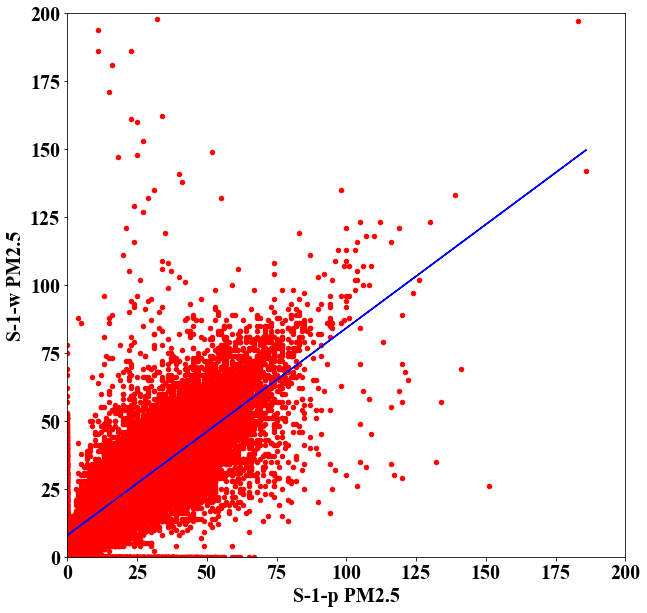

In [106]:
s1 = pd.read_csv('서면1.csv')

# 이상값 제거
s1=s1.dropna(axis=0) # 결측값 행 제거
# s1=s1['S-1-w PM10'].dropna(axis=0) # 결측값 행 제거
s1 = s1.drop(s1[s1['S-1-p PM2.5']> 200].index)
s1 = s1.drop(s1[s1['S-1-w PM2.5']>200].index)
s1.shape

y=s1['S-1-w PM2.5']
x=s1['S-1-p PM2.5']

# slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)

# print("기울기(slope) = {:3.2f}".format(slope))
# print("상관계수(correlation coefficient) = {:3.2f}" .format(r_value))
# print('R squared = {:3.2f}' .format(r_value**2))

# 선형회귀식
linear_regression = linear_model.LinearRegression()
fit = linear_regression.fit(X=pd.DataFrame(s1['S-1-p PM2.5']), y= s1['S-1-w PM2.5'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['S-1-p PM2.5']))
print(fit.score(pd.DataFrame(x),y))
print(fit.coef_)
print(fit.intercept_)


plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='S-1-p PM2.5', y='S-1-w PM2.5',color="red")
plt.plot(s1['S-1-p PM2.5'],prediction,'b')

ax.set_ylim(0,200)
ax.set_xlim(0,200)

s1['intercept'] = 1
lm = sm.OLS(s1['S-1-w PM2.5'], s1[['intercept','S-1-p PM2.5']])
results = lm.fit()
results.summary()

# s-2-p vs s-2-w (pm10)

r squared: 0.5018434369923015
기울기: [0.73047946]
y절편: 13.134054932884315


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             S-2-w PM10   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 5.605e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:09:14   Log-Likelihood:            -2.0768e+05
No. Observations:               50922   AIC:                         4.154e+05
Df Residuals:                   50920   BIC:                         4.154e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.1341      0.137     96.037      0.000      12.866      13.402
S-2-p PM10     0.7305      0.003    236.746      0.000       0.724       0.737
==============================================================================
Omnibus:                    32020.881   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2557967.545
Skew:                           2.230   Prob(JB):                         0.00
Kurtosis:                      37.434   Cond. No.                         95.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

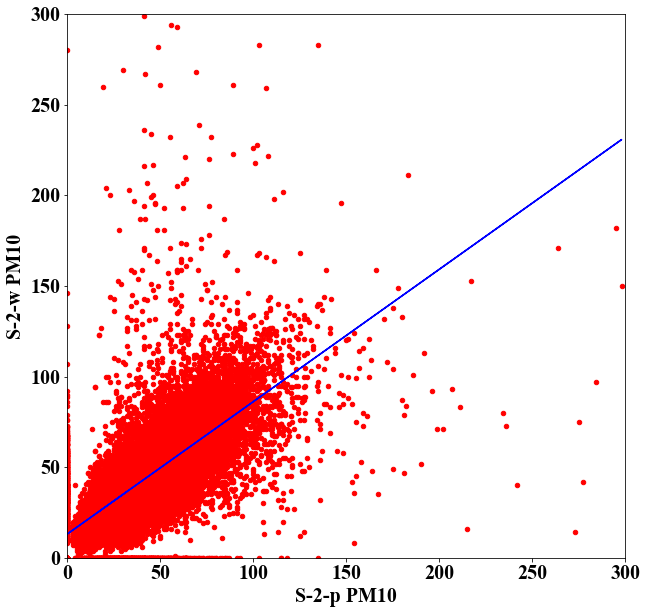

In [107]:
s1 = pd.read_csv('seomyeon2.csv')

# 이상값 제거
s1=s1.dropna(axis=0) # 결측값 행 제거
# s1=s1['S-1-w PM10'].dropna(axis=0) # 결측값 행 제거
s1 = s1.drop(s1[s1['S-2-p PM10']> 300].index)
s1 = s1.drop(s1[s1['S-2-w PM10']> 300].index)
s1.shape



# 선형회귀식
linear_regression = linear_model.LinearRegression()
fit = linear_regression.fit(X=pd.DataFrame(s1['S-2-p PM10']), y= s1['S-2-w PM10'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['S-2-p PM10']))


plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='S-2-p PM10', y='S-2-w PM10',color="red")
plt.plot(s1['S-2-p PM10'],prediction,'b')
print('r squared: {}' .format(fit.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(fit.coef_))
print('y절편: {}' .format(fit.intercept_))


ax.set_ylim(0,300)
ax.set_xlim(0,300)
s1['intercept']=1
lm = sm.OLS(s1['S-2-w PM10'], s1[['intercept','S-2-p PM10']])
results = lm.fit()
results.summary()

# s-2-p vs s-2-w (pm2.5)

r squared: 0.5876648136565764
기울기: [0.81996575]
y절편: 5.627237525419673


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            S-2-w PM2.5   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                          4.420e+05
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:53:14   Log-Likelihood:                     -1.8555e+05
No. Observations:               50917   AIC:                                  3.711e+05
Df Residuals:                   50916   BIC:                                  3.711e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
S-2-p PM2.5     0.9981      0.002    664.822      0.000       0.995       1.001
==============================================================================
Omnibus:                    23263.064   Durbin-Watson:                   0.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2540749.171
Skew:                           1.235   Prob(JB):                         0.00
Kurtosis:                      37.518   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

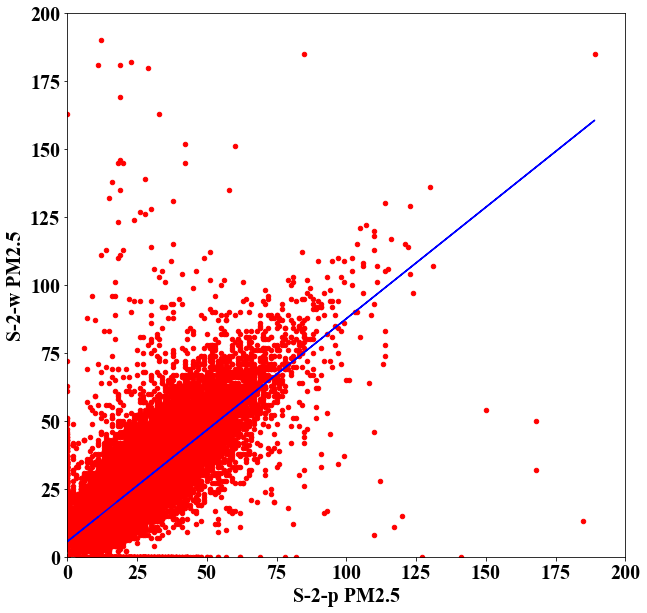

In [92]:
s1 = pd.read_csv('seomyeon2.csv')

# 이상값 제거
s1=s1.dropna(axis=0) # 결측값 행 제거
# s1=s1['S-1-w PM10'].dropna(axis=0) # 결측값 행 제거
s1 = s1.drop(s1[s1['S-2-p PM2.5']> 200].index)
s1 = s1.drop(s1[s1['S-2-w PM2.5']>200].index)
s1.shape


# 선형회귀식
linear_regression = linear_model.LinearRegression()
fit = linear_regression.fit(X=pd.DataFrame(s1['S-2-p PM2.5']), y= s1['S-2-w PM2.5'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['S-2-p PM2.5']))
print('r squared: {}' .format(fit.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(fit.coef_))
print('y절편: {}' .format(fit.intercept_))


plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='S-2-p PM2.5', y='S-2-w PM2.5',color="red")
plt.plot(s1['S-2-p PM2.5'],prediction,'b')


ax.set_ylim(0,200)
ax.set_xlim(0,200)

lm = sm.OLS(s1['S-2-w PM2.5'], s1[['S-2-p PM2.5']])
results = lm.fit()
results.summary()

# 1) PM10 vs PM2.5 (S-1-p)

r squared: 0.6521334893122925
기울기: [0.52327162]
y절편: 0.7423265938472454


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            S-1-p PM2.5   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                          4.754e+05
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:10:56   Log-Likelihood:                     -1.7673e+05
No. Observations:               49341   AIC:                                  3.535e+05
Df Residuals:                   49340   BIC:                                  3.535e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S-1-p PM10     0.5364      0.001    689.506      0.000       0.535       0.538
==============================================================================
Omnibus:                    12841.892   Durbin-Watson:                   0.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233202.802
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                      13.533   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

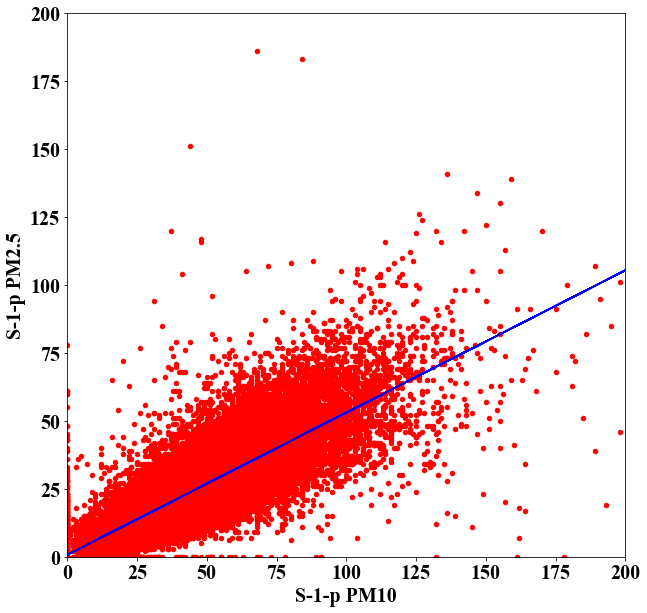

In [108]:
s1 = pd.read_csv('seomyeon.csv')

# 이상값 제거
s1=s1.dropna(axis=0) # 결측값 행 제거
# s1=s1['S-1-w PM10'].dropna(axis=0) # 결측값 행 제거
s1 = s1.drop(s1[s1['S-1-p PM10']> 300].index)
s1 = s1.drop(s1[s1['S-1-p PM2.5']>200].index)
s1.shape

y=s1['S-1-p PM2.5']
x=s1['S-1-p PM10']


# 선형회귀식
linear_regression = linear_model.LinearRegression()
fit = linear_regression.fit(X=pd.DataFrame(s1['S-1-p PM10']), y= s1['S-1-p PM2.5'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['S-1-p PM10']))
print('r squared: {}' .format(fit.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(fit.coef_))
print('y절편: {}' .format(fit.intercept_))


plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='S-1-p PM10', y='S-1-p PM2.5',color="red")
plt.plot(s1['S-1-p PM10'],prediction,'b')


ax.set_ylim(0,200)
ax.set_xlim(0,200)
lm = sm.OLS(s1['S-1-p PM2.5'], s1[['S-1-p PM10']])
results = lm.fit()
results.summary()

#   2) PM10 vs PM2.5 (S-1-w)

r squared: 0.639091879322581
기울기: [0.55229453]
y절편: 0.9871638382943004


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            S-1-w PM2.5   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                          6.339e+05
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:12:25   Log-Likelihood:                     -1.7309e+05
No. Observations:               49333   AIC:                                  3.462e+05
Df Residuals:                   49332   BIC:                                  3.462e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S-1-w PM10     0.5698      0.001    796.170      0.000       0.568       0.571
==============================================================================
Omnibus:                    20850.519   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3451745.156
Skew:                           0.954   Prob(JB):                         0.00
Kurtosis:                      43.934   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

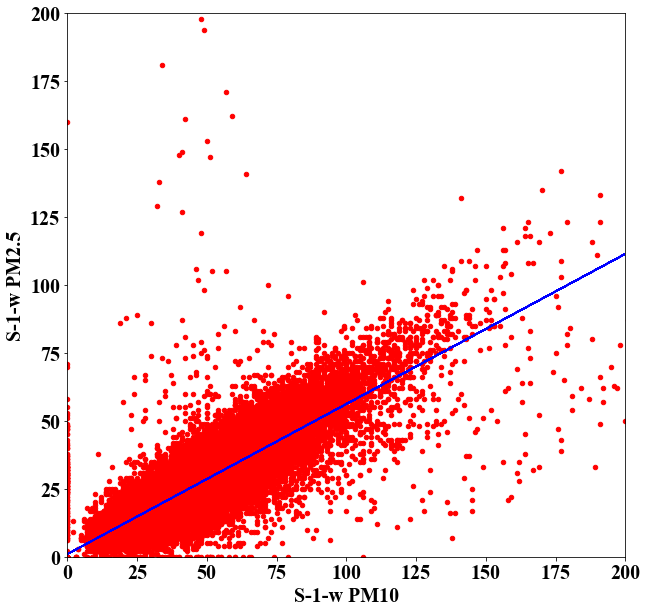

In [109]:
s1 = pd.read_csv('seomyeon.csv')

# 이상값 제거
s1=s1.dropna(axis=0) # 결측값 행 제거
# s1=s1['S-1-w PM10'].dropna(axis=0) # 결측값 행 제거
s1 = s1.drop(s1[s1['S-1-w PM10']> 300].index)
s1 = s1.drop(s1[s1['S-1-w PM2.5']>200].index)
s1.shape


# 선형회귀식
linear_regression = linear_model.LinearRegression()
fit = linear_regression.fit(X=pd.DataFrame(s1['S-1-w PM10']), y= s1['S-1-w PM2.5'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['S-1-w PM10']))


plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='S-1-w PM10', y='S-1-w PM2.5',color="red")
plt.plot(s1['S-1-w PM10'],prediction,'b')

print('r squared: {}' .format(fit.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(fit.coef_))
print('y절편: {}' .format(fit.intercept_))

ax.set_ylim(0,200)
ax.set_xlim(0,200)
lm = sm.OLS(s1['S-1-w PM2.5'], s1[['S-1-w PM10']])
results = lm.fit()
results.summary()

#   3) PM10 vs PM2.5 (S-2-p)

r squared: 0.639091879322581
기울기: [0.55229453]
y절편: 0.9871638382943004


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            S-2-p PM2.5   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          3.893e+05
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:56:07   Log-Likelihood:                     -1.7923e+05
No. Observations:               49363   AIC:                                  3.585e+05
Df Residuals:                   49362   BIC:                                  3.585e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S-2-p PM10     0.5813      0.001    623.955      0.000       0.579       0.583
==============================================================================
Omnibus:                    11026.720   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           510502.640
Skew:                          -0.164   Prob(JB):                         0.00
Kurtosis:                      18.751   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

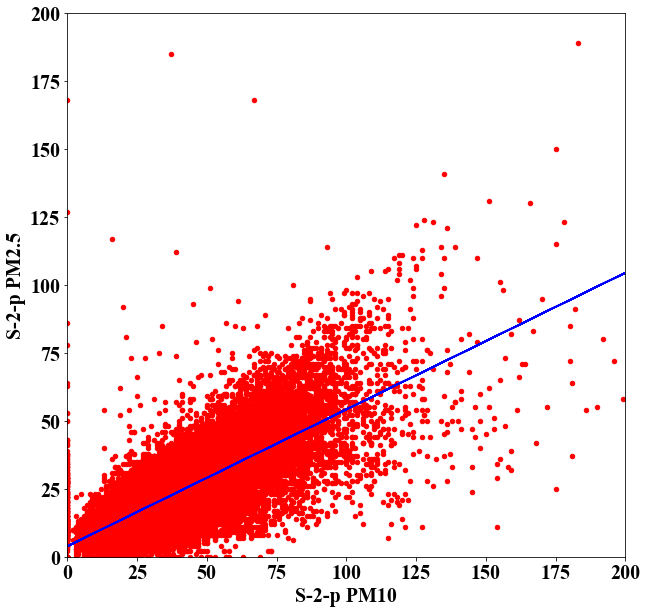

In [98]:
s1 = pd.read_csv('seomyeon.csv')

# 이상값 제거
s1=s1.dropna(axis=0) # 결측값 행 제거
# s1=s1['S-1-w PM10'].dropna(axis=0) # 결측값 행 제거
s1 = s1.drop(s1[s1['S-2-p PM10']> 300].index)
s1 = s1.drop(s1[s1['S-2-p PM2.5']>200].index)
s1.shape

# 선형회귀식
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(s1['S-2-p PM10']), y= s1['S-2-p PM2.5'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['S-2-p PM10']))


plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='S-2-p PM10', y='S-2-p PM2.5',color="red")
plt.plot(s1['S-2-p PM10'],prediction,'b')
print('r squared: {}' .format(fit.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(fit.coef_))
print('y절편: {}' .format(fit.intercept_))


ax.set_ylim(0,200)
ax.set_xlim(0,200)

lm = sm.OLS(s1['S-2-p PM2.5'], s1[['S-2-p PM10']])
results = lm.fit()
results.summary()

#   4) PM10 vs PM2.5 (S-2-w)



r squared: 0.6781203774426483
기울기: [0.56272798]
y절편: 1.396345127449358


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            S-2-w PM2.5   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          5.764e+05
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:56:47   Log-Likelihood:                     -1.7261e+05
No. Observations:               49311   AIC:                                  3.452e+05
Df Residuals:                   49310   BIC:                                  3.452e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S-2-w PM10     0.5897      0.001    759.208      0.000       0.588       0.591
==============================================================================
Omnibus:                    15202.525   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1895648.998
Skew:                           0.396   Prob(JB):                         0.00
Kurtosis:                      33.364   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

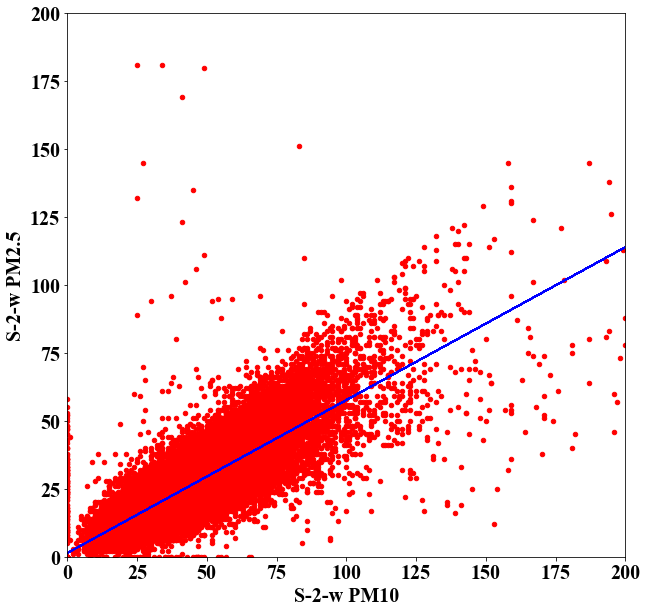

In [101]:
s1 = pd.read_csv('seomyeon.csv')

# 이상값 제거
s1=s1.dropna(axis=0) # 결측값 행 제거
# s1=s1['S-1-w PM10'].dropna(axis=0) # 결측값 행 제거
s1 = s1.drop(s1[s1['S-2-w PM10']> 300].index)
s1 = s1.drop(s1[s1['S-2-w PM2.5']>200].index)
s1.shape

y=s1['S-2-w PM2.5']
x=s1['S-2-w PM10']

# 선형회귀식
linear_regression = linear_model.LinearRegression()
fit = linear_regression.fit(X=pd.DataFrame(s1['S-2-w PM10']), y= s1['S-2-w PM2.5'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['S-2-w PM10']))


plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='S-2-w PM10', y='S-2-w PM2.5',color="red")
plt.plot(s1['S-2-w PM10'],prediction,'b')
print('r squared: {}' .format(fit.score(pd.DataFrame(x),y)))
print('기울기: {}' .format(fit.coef_))
print('y절편: {}' .format(fit.intercept_))


ax.set_ylim(0,200)
ax.set_xlim(0,200)

lm = sm.OLS(s1['S-2-w PM2.5'], s1[['S-2-w PM10']])
results = lm.fit()
results.summary()